In [1]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

/var/folders/2r/1l6yc2bx3m56rxmdpbz1z5w80000gn/T/ipykernel_51383/1500862777.py:1: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can be reported on the Dask issue tracker
https://github.com/dask/dask/issues 

  import dask.dataframe as dd


In [3]:
ft_dir = os.getenv("FEATURES_DATA")
ft_dir

ft_glob = glob(ft_dir+'/*.parquet')
ft_glob

['../../05_src/data/features/stock_features.parquet/part.384.parquet',
 '../../05_src/data/features/stock_features.parquet/part.394.parquet',
 '../../05_src/data/features/stock_features.parquet/part.245.parquet',
 '../../05_src/data/features/stock_features.parquet/part.255.parquet',
 '../../05_src/data/features/stock_features.parquet/part.410.parquet',
 '../../05_src/data/features/stock_features.parquet/part.400.parquet',
 '../../05_src/data/features/stock_features.parquet/part.123.parquet',
 '../../05_src/data/features/stock_features.parquet/part.133.parquet',
 '../../05_src/data/features/stock_features.parquet/part.141.parquet',
 '../../05_src/data/features/stock_features.parquet/part.151.parquet',
 '../../05_src/data/features/stock_features.parquet/part.472.parquet',
 '../../05_src/data/features/stock_features.parquet/part.462.parquet',
 '../../05_src/data/features/stock_features.parquet/part.227.parquet',
 '../../05_src/data/features/stock_features.parquet/part.237.parquet',
 '../.

In [4]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [5]:
df.sample(n = 5)

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
1947914,FTV,2019-11-05,61.849373,62.217571,61.071129,61.514645,60.256184,1878421,Industrials,Industrial Machinery & Supplies & Components,2019,61.698746,-0.002984,0,0.0
1538869,SLB,2014-04-14,97.849998,99.330002,97.709999,98.480003,74.164444,6203500,Energy,Oil & Gas Equipment & Services,2014,97.099998,0.014212,1,1.0
2250532,LIN,2005-07-15,47.919998,48.130001,47.790001,47.880001,33.046589,655800,Materials,Industrial Gases,2005,47.910000,-0.000626,0,0.0
1301277,SPG,2009-10-08,63.933998,65.439095,63.933998,64.392075,34.311932,3797745,Real Estate,Retail REITs,2009,63.634850,0.011900,1,1.0
1128164,EIX,2003-05-29,16.850000,16.850000,15.750000,16.100000,7.946791,2243700,Utilities,Electric Utilities,2003,16.639999,-0.032452,0,1.0


In [6]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [7]:
idx = df['ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5507, 15), (55073, 15))

Look at the distribution of tickers.

<Axes: xlabel='ticker'>

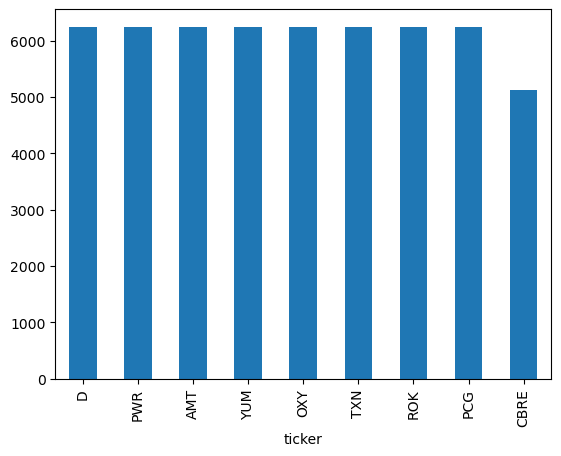

In [8]:
small_df['ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='ticker'>

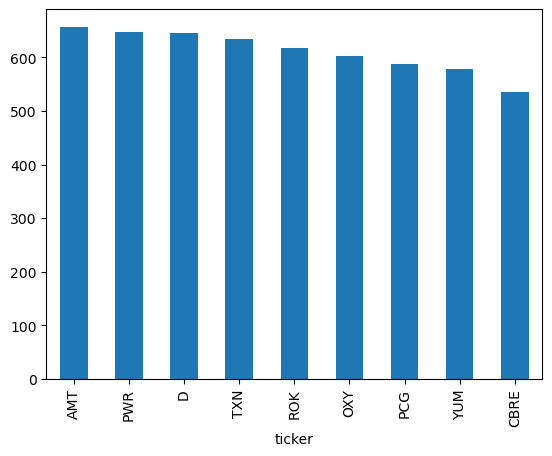

In [9]:
simple_sample_dt['ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='ticker'>

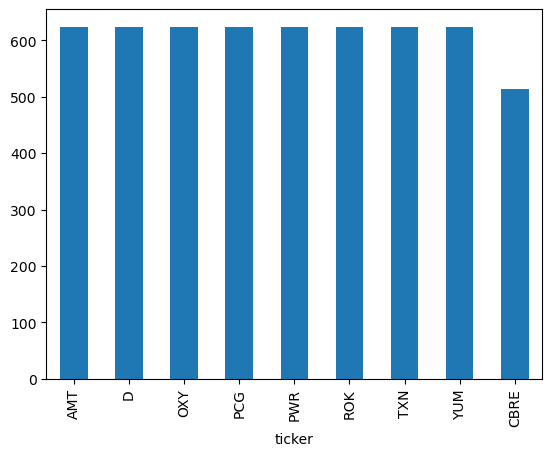

In [10]:
strat_sample_dt = small_df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

/var/folders/2r/1l6yc2bx3m56rxmdpbz1z5w80000gn/T/ipykernel_51383/2932236319.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: xlabel='ticker'>

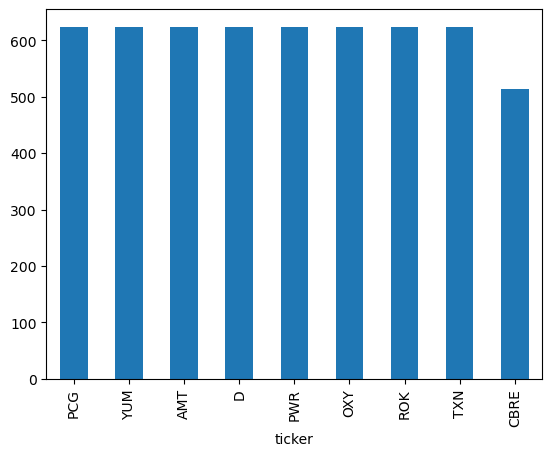

In [11]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['ticker'].isin(select_tickers)]['ticker'].value_counts().plot(kind='bar')